# Data & Lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import AdamW, get_linear_schedule_with_warmup

import emoji, re
from fetchData import fetchdata, cv_events
import __MLP
# from __MLP import getSamplers, convert_df_to_unsqueezed_tensor, train_sequential, clf_report
import random

import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', 150)

In [127]:
# ext_sparse_processed = pd.read_csv('./data/tagged/_PHEMEext_textonly_token.csv')
pheme_textonly= pd.read_csv('./data/tagged/_PHEME_textonly.csv',sep='\t')
pheme_text= pd.read_csv('./data/_PHEME_text.csv')
pheme_extonly= pd.read_csv('./data/_PHEMEext_textonly.csv',sep='\t')
pheme_pos= pd.read_csv('./data/tagged/_PHEME_textonly_token.csv',sep='\t')
ext_pos= pd.read_csv('./data/tagged/_PHEMEext_textonly_token2.csv',sep='\t')
pheme_sparse= pd.read_csv('./data/_PHEME_sparse.csv')
ext_sparse= pd.read_csv('./data/_PHEMEext_sparse.csv')
 
pheme_pos_final= pd.read_csv('./data/tagged/_PHEME_pos_final.csv',sep='\t')
ext_pos_final= pd.read_csv('./data/tagged/_PHEMEext_pos_final.csv',sep='\t')

pheme_y= fetchdata('pheme','target').target
ext_y= fetchdata('ext','target').target

pheme_text = fetchdata('pheme','text')

In [214]:
phemeall =  pd.read_csv('./data/all/_PHEMEall_text.csv').text
phemeall.to_csv('./data/all/_PHEMEall_text.csv',index=False)
extall =  pd.read_csv('./data/all/_PHEMEextall_text.csv').text
extall.to_csv('./data/all/_PHEMEextall_text.csv',index=False)

In [4]:
pheme_sparse_pos = pheme_sparse[['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                                 'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs']]
ext_sparse_pos = ext_sparse[['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                             'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs']]
pheme_sparse_pos_pronouns = pheme_sparse[['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                                          'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs', 'FirstPersonPronoun',
                                          'SecondPersonPronoun', 'ThirdPersonPronoun']]
ext_sparse_pos_pronouns = ext_sparse[['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                                      'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs', 'FirstPersonPronoun',
                                      'SecondPersonPronoun', 'ThirdPersonPronoun']]
pheme_sparse_pronouns = pheme_sparse[['FirstPersonPronoun',
                                      'SecondPersonPronoun', 'ThirdPersonPronoun']]
ext_sparse_pronouns = ext_sparse[['FirstPersonPronoun',
                                  'SecondPersonPronoun', 'ThirdPersonPronoun']]
pheme_sparse_nopos = pheme_sparse.drop(['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                             'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs'], axis=1)
ext_sparse_nopos = ext_sparse.drop(['Noun', 'Verb', 'Adjective', 'Pronoun',  'Adverb', 'Numeral',
                             'Conjunction_inj', 'Particle', 'Determiner', 'Modal', 'Whs'],axis=1)

## PHEME ALL

In [236]:
extall_POS =  pd.read_csv('/Users/june/Documents/Code/FYP/TweetNLP/temp_result.csv',sep='\n')
extall_POS2 =  pd.read_csv('/Users/june/Documents/Code/FYP/TweetNLP/temp_result.txt',sep='\t')

In [237]:
print(extall.shape)
print(extall_POS.shape)
extall_POS.head()

(1963,)
(2140, 1)


,text\tN\t0.7899\ttext
0,@Mourinholic 😕😕 http://t.co/sFoV1v8uDo\t@ G U\t0.9992 0.2120 0.9967\t@Mourinholic 😕😕 http://t.co/sFoV1v8uDo
1,"“ @Mourinholic : Micheal Essien denying the Ebola rumours like https://t.co/8Yo8iLgISS ”\t, @ ~ ^ ^ V D ^ N P U ,\t0.9421 0.9968 0.9910 0.9994 0.9..."
2,"@Mourinholic Hmmm .\t@ ! ,\t0.9990 0.9982 0.9969\t@Mourinholic Hmmm."
3,"@Mourinholic Even though it was against us , it was a bloody amazing goal . \t, @ R P O V P O , O V D A A N , ,\t0.9203 0.9983 0.9970 0.9575 0.99..."
4,"@CdtChoco1er thanks bro .\t@ N N ,\t0.9985 0.9199 0.9924 0.9988\t@CdtChoco1er thanks bro."


In [235]:
print(extall.shape)
print(extall_POS2.shape)
extall_POS2.head()

(1963,)
(2184, 4)


,text,N,0.7899,text.1
0,@Mourinholic 😕😕 http://t.co/sFoV1v8uDo,@ G U,0.9992 0.2120 0.9967,@Mourinholic 😕😕 http://t.co/sFoV1v8uDo
1,“ @Mourinholic : Micheal Essien denying the Ebola rumours like https://t.co/8Yo8iLgISS ”,", @ ~ ^ ^ V D ^ N P U ,",0.9421 0.9968 0.9910 0.9994 0.9937 0.9997 0.9993 0.8274 0.8219 0.9100 0.9868 0.9449,“@Mourinholic: Micheal Essien denying the Ebola rumours like https://t.co/8Yo8iLgISS”
2,@Mourinholic Hmmm .,"@ ! ,",0.9990 0.9982 0.9969,@Mourinholic Hmmm.
3,"@Mourinholic Even though it was against us , it was a bloody amazing goal .",", @ R P O V P O , O V D A A N , ,",0.9203 0.9983 0.9970 0.9575 0.9987 0.9995 0.9853 0.9344 0.9977 0.9971 0.9997 0.9988 0.8880 0.9957 0.9986 0.9989 0.9709,"@Mourinholic Even though it was against us, it was a bloody amazing goal."
4,@CdtChoco1er thanks bro .,"@ N N ,",0.9985 0.9199 0.9924 0.9988,@CdtChoco1er thanks bro.


## Data Check

In [145]:
print(pheme_textonly.shape); print(pheme_extonly.shape)

(5802, 1)
(485, 1)


In [146]:
pheme_pos_final.head()

,processed_text,POStags,proba,original_text
0,BREAKING : Armed man takes hostage in kosher grocery east of Paris http://t.co/PBs3sMwhLt,"N , A N V N P A N N P ^ U",0.6086 0.9832 0.4822 0.9973 0.9819 0.9780 0.9852 0.9810 0.9235 0.5818 0.9989 0.9989 0.9981,BREAKING: Armed man takes hostage in kosher grocery east of Paris http://t.co/PBs3sMwhLt ...
1,"#CharlieHebdo killers dead , confirmed by gendarmerie .","# N A , V P ^ ,",0.7572 0.5413 0.7980 0.9988 0.9810 0.9893 0.7627 0.9939,"#CharlieHebdo killers dead, confirmed by gendarmerie. ..."
2,"Top French cartoonists Charb , Cabu , Wolinski , Tignous confirmed among dead in #Paris #CharlieHebdo attack . Editor is critically wounded .","A ^ N V , ^ , ^ , ^ V P A P ^ ^ N , N V R A ,",0.9429 0.5236 0.9900 0.3360 0.9967 0.8644 0.9948 0.9043 0.9948 0.6443 0.9759 0.9830 0.8947 0.9914 0.6474 0.8114 0.5487 0.9977 0.9616 0.9952 0.9975...,"Top French cartoonists Charb, Cabu, Wolinski, Tignous confirmed among dead in #Paris #CharlieHebdo attack. Editor is critically wounded. ..."
3,Police have surrounded the area where the #CharlieHebdo attack suspects are believed to be : http://t.co/3tGXEIX4F2 https://t.co/aBSezf2QWS,"^ V V D N R D ^ V V V V P V , U U",0.5557 0.9941 0.9846 0.9993 0.8847 0.9220 0.9868 0.9265 0.8443 0.8949 0.9825 0.9309 0.9817 0.9960 0.9067 0.9947 0.9977,Police have surrounded the area where the #CharlieHebdo attack suspects are believed to be: http://t.co/3tGXEIX4F2 https://t.co/aBSezf2QWS ...
4,PHOTO : Armed gunmen face police officers near #CharlieHebdo HQ in Paris http://t.co/3Jsosc7yl3 http://t.co/iOpVNO6Iq0,"N , A N N N N P ^ ^ P ^ U U",0.9901 0.9859 0.6329 0.9879 0.9015 0.6475 0.7908 0.9858 0.8528 0.9006 0.9963 0.9977 0.9955 0.9994,PHOTO: Armed gunmen face police officers near #CharlieHebdo HQ in Paris http://t.co/3Jsosc7yl3 http://t.co/iOpVNO6Iq0 ...


In [147]:
ext_pos_final.head()

,processed_text,POStags,proba,original_text
0,Micheal Essien denying the Ebola rumours like https://t.co/H2E1TAzeha,^ ^ V D ^ N P U,0.9987 0.9934 0.9997 0.9994 0.8274 0.8091 0.9177 0.9935,Micheal Essien denying the Ebola rumours like https://t.co/H2E1TAzeha
1,No truth in internet rumours that I have contracted Ebola . i m very well & I'm doing very gud & will be training as usual tomorrow . #falsenews,"D N P N N P O V V ^ , O V R R & L V R A & V V N P A N , #",0.8772 0.9968 0.9936 0.9153 0.9477 0.9752 0.9995 0.9998 0.9695 0.7780 0.9965 0.9333 0.9256 0.9917 0.5153 0.9895 0.9959 0.9939 0.9895 0.9981 0.9942...,No truth in internet rumours that I have contracted Ebola.i m very well &amp; I'm doing very gud &amp; will be training as usual tomorrow.#falsenews
2,Essien and his lawyers are considering to file a lawsuit against the Nigerian media that reported the fake Ebola story .,"^ & D N V V P V D N P D ^ N P V D A ^ N ,",0.9064 0.9984 0.9978 0.9972 0.9944 0.9660 0.9899 0.9900 0.9966 0.9953 0.9998 0.9985 0.8974 0.8566 0.8431 0.9956 0.9996 0.9763 0.6529 0.9933 0.9978,Essien and his lawyers are considering to file a lawsuit against the Nigerian media that reported the fake Ebola story.
3,Good news : The rumours that Michael Essien has contracted the Ebola virus are false . http://t.co/5d7hCL46mR http://t.co/VtGuLnjWBD,"A N , D N P ^ ^ V V D ^ N V A , U U",0.9648 0.9985 0.7902 0.9930 0.9866 0.8974 0.9996 0.9949 0.9966 0.9981 0.9993 0.9321 0.9860 0.9878 0.9896 0.9979 0.9954 0.9986,Good news: The rumours that Michael Essien has contracted the Ebola virus are false. http://t.co/5d7hCL46mR http://t.co/VtGuLnjWBD
4,Milan have stated that the reports about Essien having Ebola are completely false . http://t.co/Sb9v9ulfTX @MichaelEssien,"^ V V P D N P ^ V ^ V R A , U @",0.9883 0.9935 0.9839 0.8956 0.9968 0.9879 0.9860 0.9582 0.9981 0.7131 0.9523 0.9994 0.9815 0.9984 0.9959 0.9964,Milan have stated that the reports about Essien having Ebola are completely false. http://t.co/Sb9v9ulfTX @MichaelEssien


In [70]:
def text_preprocessing_simple(text, lemma=False, twttknzr=True): # Create a function to tokenize a set of texts

    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """

    # text = re.sub(r"http\S+", "*", text)  # http link -> '*'
    # sent = re.sub(r'([^\s\w@#\*]|_)+', '', sent) # Erasing Special Characters

    text = emoji.demojize(text)
    text = re.sub(r':[^:\s]*:', r' \g<0>', text)  # http link -> '*'

    # text = re.sub(r':[^:\s]*(?:::[^:\s]*)*:', r' \g<0> ', text)  # http link -> '*'

    # text = re.sub(r"\n", " ", text)   # mention -> '@'
    text = re.sub(r"http\S+", "HTTPURL", text)  # http link -> '*'
    # text = re.sub(r"@\S+", "@USER", text)   # mention -> '@'
    
    text = re.sub(r"@[A-Za-z0-9]+", "@USER", text)   # mention -> '@'

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'&amp;', '&', text)
    # text = tweetTokenizer.tokenize(text)
    # text = [emoji.demojize(token) for token in text]

    return text

def text_preprocessing_pos(text, lemma=False, twttknzr=False): # Create a function to tokenize a set of texts

    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """

    # text = re.sub(r"http\S+", "*", text)  # http link -> '*'
    # sent = re.sub(r'([^\s\w@#\*]|_)+', '', sent) # Erasing Special Characters

    text = emoji.demojize(text)
    text = re.sub(r':[^:\s]*:', r' \g<0>', text)  # http link -> '*'

    # text = re.sub(r':[^:\s]*(?:::[^:\s]*)*:', r' \g<0> ', text)  # http link -> '*'

    # text = re.sub(r"\n", " ", text)   # mention -> '@'
    text = re.sub(r"http\S+", "HTTPURL", text)  # http link -> '*'
    # text = re.sub(r"@\S+", "@USER", text)   # mention -> '@'
    
    text = re.sub(r"@[A-Za-z0-9]+", "@USER", text)   # mention -> '@'

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'&amp;', '&', text)
    # text = tweetTokenizer.tokenize(text)
    # text = [emoji.demojize(token) for token in text]

    return text

In [73]:
result = [text_preprocessing_pos(sent) for sent in pheme_textonly.text]

In [144]:
print(tokenizer.tokenize(text_preprocessing_simple(pheme_extonly.iloc[5][0])))

['I@@', "'m", 'very', 'fit', 'and', 'very', 'health@@', 'y@@', ',@@', 'No', 'truth', 'in', 'the', 'internet', 'rumours', 'that', 'I', 'have', 'contracted', 'E@@', 'bol@@', 'a.@@', 'im', 'well', '&@@', '…', 'HTTPURL']


In [142]:
print(pheme_extonly.iloc[5][0])
print(ext_pos_final.iloc[5][0])
print(ext_pos_final.iloc[5][1])
print(text_preprocessing_simple(pheme_extonly.iloc[5][0]))

I'm very fit and very healthy,No truth in the internet rumours that I have contracted Ebola.im well &amp;… http://t.co/TGidyI5JVG
I'm very fit and very healthy , No truth in the internet rumours that I have contracted Ebola.im well & … http://t.co/TGidyI5JVG
L R V & R A , D N P D N N P O V V U R & , U
I'm very fit and very healthy,No truth in the internet rumours that I have contracted Ebola.im well &… HTTPURL


# Data Processing

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
pheme_pos_final= pd.read_csv('./data/tagged/_PHEME_pos_final.csv',sep='\t')

# pheme_pos_final.iloc[1304].processed_text="' We are all Charlie ” : European newspapers show solidarity with Charlie Hebdo after attack http://t.co/xq1OQhDJVF http://t.co/jt7D6fuIBH"
# pheme_pos_final.iloc[1304].POStags=", O V D ^ , , A N V N P ^ ^ P N U U"
# pheme_pos_final.iloc[1304].proba="0.9905 0.9951 0.9998 0.8048 0.9974 0.9494 0.9120 0.9475 0.9980 0.5189 0.9962 0.9990 0.9996 0.9758 0.8693 0.7830 0.9949 0.9991"
# pheme_pos_final.iloc[1304].original_text="We are all Charlie”: European newspapers show solidarity with Charlie Hebdo after attack http://t.co/xq1OQhDJVF http://t.co/jt7D6fuIBH"

In [8]:
print(pheme_pos_final.loc[pheme_pos_final.POStags.isna() == True])
# print(pheme_pos_final.iloc[1304])
# print(pheme_pos_final.iloc[1305].processed_text)

Empty DataFrame
Columns: [processed_text, POStags, proba, original_text]
Index: []


In [191]:
pheme_POS = [sent for sent in pheme_pos_final['POStags'].values]
ext_POS = [sent for sent in ext_pos_final['POStags'].values]

# vector = CountVectorizer(analyzer='char_wb')
vector = CountVectorizer(analyzer='char')
train = vector.fit_transform(pheme_POS)
test = vector.transform(ext_POS)
print(vector.vocabulary_)  # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.
# print(vector.transform(pheme_POS).toarray())  # 코퍼스로부터 각 단어의 빈도 수를 기록한다. 
# pd.DataFrame(vector.fit_transform(POS).toarray())
countvect_train = pd.DataFrame(train.todense(), columns=vector.get_feature_names())
countvect_test = pd.DataFrame(test.todense(), columns=vector.get_feature_names())
countvect_train = countvect_train.iloc[:,1:].drop(['e','$'],axis=1)
countvect_test = countvect_test.iloc[:,1:].drop(['e','$'],axis=1)

{'n': 13, ' ': 0, ',': 5, 'a': 8, 'v': 20, 'p': 15, '^': 7, 'u': 19, '#': 2, 'r': 16, 'd': 9, '$': 3, 's': 17, 'o': 14, '&': 4, 'l': 12, '@': 6, 't': 18, '~': 23, '!': 1, 'g': 11, 'z': 22, 'x': 21, 'e': 10}


# Export

In [192]:
countvect_train.to_csv("./data/_PHEME_postags", index = False)
countvect_test.to_csv("./data/_PHEMEext_postags",index = False)

# 데이터 비교

In [194]:
train = pd.concat([countvect_train,pheme_sparse_pos,pheme_text, pheme_sparse_nopos],axis=1)
test = pd.concat([countvect_test,ext_sparse_pos,ext_sparse_nopos],axis=1)

In [201]:
train.columns

# ndex(['!', '#', '$', '&', ',', '@', '^', 'a', 'd', 'e', 'g', 'l', 'n', 'o',
#        'p', 'r', 's', 't', 'u', 'v', 'x', 'z', '~', 'Noun', 'Verb',
#        'Adjective', 'Pronoun', 'Adverb', 'Numeral', 'Conjunction_inj',
#        'Particle', 'Determiner', 'Modal', 'Whs', 'text', 'Event', 'target',
#        'emoji_count', 'URLcount', 'has_media', 'Skepticism', 'MentionCount',
#        'FirstPersonPronoun', 'SecondPersonPronoun', 'ThirdPersonPronoun',
#        'char_count', 'word_count', 'HashTag', 'has_question', 'has_exclaim',
#        'has_period', 'capital_ratio', 'retweet_count', 'isRT', 'tweet_count',
#        'listed_count', 'friends_count', 'follower_count', 'followers/friend',
#        'favourites_count', 'account_age_days', 'verified'],
#       dtype='object')

Index(['!', '#', '&', ',', '@', '^', 'a', 'd', 'g', 'l', 'n', 'o', 'p', 'r',
       's', 't', 'u', 'v', 'x', 'z', '~', 'Noun', 'Verb', 'Adjective',
       'Pronoun', 'Adverb', 'Numeral', 'Conjunction_inj', 'Particle',
       'Determiner', 'Modal', 'Whs', 'text', 'Event', 'target', 'emoji_count',
       'URLcount', 'has_media', 'Skepticism', 'MentionCount',
       'FirstPersonPronoun', 'SecondPersonPronoun', 'ThirdPersonPronoun',
       'char_count', 'word_count', 'HashTag', 'has_question', 'has_exclaim',
       'has_period', 'capital_ratio', 'retweet_count', 'isRT', 'tweet_count',
       'listed_count', 'friends_count', 'follower_count', 'followers/friend',
       'favourites_count', 'account_age_days', 'verified'],
      dtype='object')

In [238]:
train.describe()
train[['text','^','v','Verb','n','Noun', 'o','Pronoun','a','Adjective','Adverb','r', '#', 'HashTag','u','URLcount','@','MentionCount']]

,text,^,v,Verb,n,Noun,o,Pronoun,a,Adjective,Adverb,r,#,HashTag,u,URLcount,@,MentionCount
0,BREAKING: Armed man takes hostage in kosher grocery east of Paris http://t.co/PBs3sMwhLt,1,1,3,5,6,0,0,2,0,0,0,0,0,1,1,0,0
1,"#CharlieHebdo killers dead, confirmed by gendarmerie.",1,1,2,1,2,0,0,1,0,0,0,1,1,0,0,0,0
2,"Top French cartoonists Charb, Cabu, Wolinski, Tignous confirmed among dead in #Paris #CharlieHebdo attack. Editor is critically wounded.",6,3,4,3,3,0,0,3,6,1,1,0,2,0,0,0,0
3,Police have surrounded the area where the #CharlieHebdo attack suspects are believed to be: http://t.co/3tGXEIX4F2\nhttps://t.co/aBSezf2QWS,2,7,5,1,4,0,0,0,0,0,1,0,1,2,2,0,0
4,PHOTO: Armed gunmen face police officers near #CharlieHebdo HQ in Paris http://t.co/3Jsosc7yl3 http://t.co/iOpVNO6Iq0,3,0,2,5,6,0,0,1,0,0,0,0,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,'I'll ride with you' http://t.co/llZnuCAzg5 Australia unites during #SydneySiege http://t.co/WIU22VPgkz,2,2,2,0,2,1,1,0,0,0,0,0,1,2,2,0,0
5798,Canada's thoughts and prayers are with our Australian friends. #MartinPlace #SydneySiege,0,1,2,3,4,0,1,1,1,0,0,2,2,0,0,0,0
5799,Every non-muslim in the world must watch this video https://t.co/sZdyhISoVh &amp; show it every other non-muslim! #sydneysiege,0,3,3,2,4,1,1,3,1,0,0,1,1,1,1,0,0
5800,"Suspect in Sydney cafe siege identified as Man Haron Monis, an Iranian granted asylum in Australia http://t.co/6Lrl9DEMXA",3,1,3,6,7,0,0,2,2,0,0,0,0,1,1,0,0


In [239]:
train.loc[train.MentionCount != train['@']][['text','@','MentionCount']]

,text,@,MentionCount
462,"Brilliant #CharlieHebdo satirists did not attack #Islam, but poked fun @ #intolerance &amp; #extremism of all kind inc #racism &amp; #islamophobia.",0,1
471,"The shooting @ ""Charlie Hebdo"", in France, is a horrible tragedy. Ignorance, hatred and cowardice has no religion, no political allegiance.",0,1
1044,"@FT's Tony Barber describes #CharlieHebdo as ""editorially foolish"" and ""stupid"" http://t.co/dFan6rptkM http://t.co/cmiaUNA0eO",0,1
2104,Police have named the cop who shot Michael Brown. @alicesperi's latest report from #Ferguson: http://t.co/1K79nsOtx3 http://t.co/cV3VCkUR6L,0,1
2920,This is sheer insanity. Just look at @sebwalker's photo from #Ferguson. http://t.co/6f8dNxWBeO,0,1
3840,#RCMP news conference on #Ottawa shootings expected to begin momentarily. Watch live @ http://t.co/kngapKTSCe,0,1
4035,"#RCMP to hold news conference on #Ottawa shootings at 2 pm ET, 11 am PT. Watch live coverage @ http://t.co/kngapKTSCe",0,1
4199,.@IvisonJ's first-hand account of the scene in Ottawa that will 'change this country forever' http://t.co/g5lhxHqNNs http://t.co/AP0stmObnn,0,1
4363,#RCMP asking for assistance if you have any photos or videos from #ottawa shooting send to: NatDiv_Media_DivNat@rcmp-grc.gc.ca,0,1
4374,#RCMP asking for assistance if you have any photos or videos from #ottawa shooting please send to: NatDiv_Media_DivNat@rcmp-grc.gc.ca,0,1


In [141]:
train.isRT.value_counts()

0    5802
Name: isRT, dtype: int64

# CLF - Root

## Trad

In [10]:
def train_test(X_train, X_test, y_train, y_test, clf):
    clf.fit(X_train, y_train)
    result = clf.predict(X_test)
    print("Accuracy:\t\t",accuracy_score(y_test,result))
    print('Precision Score:\t', str(precision_score(y_test,result)))
    print('Recall Score:\t\t' + str(recall_score(y_test,result)))
    print("F1 Score:\t\t",f1_score(y_test, result, average='macro', zero_division=True))
    print(classification_report(y_test, result))


In [337]:
from sklearn.naive_bayes import MultinomialNB

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, min_df=1, max_df=0.9, ngram_range=(1,2), analyzer='char')
train_pos = tfidf_vectorizer.fit_transform(pheme_POS)
test_pos = tfidf_vectorizer.transform(ext_POS)

clf = MultinomialNB(alpha=0.1).fit(train_pos, pheme_y)
predicted = clf.predict(test_pos)


In [188]:
clf = SVC()
train_test(countvect_train[['$','v']], countvect_test[['$','v']], pheme_y, ext_y, clf)

Accuracy:		 0.2556701030927835
Precision Score:	 0.6428571428571429
Recall Score:		0.04878048780487805
F1 Score:		 0.23033132437434337
              precision    recall  f1-score   support

           0       0.23      0.91      0.37       116
           1       0.64      0.05      0.09       369

    accuracy                           0.26       485
   macro avg       0.44      0.48      0.23       485
weighted avg       0.54      0.26      0.16       485



In [183]:
clf = SVC()
train_test(pheme_sparse_pos, ext_sparse_pos, pheme_y, ext_y, clf)

Accuracy:		 0.2556701030927835
Precision Score:	 0.7
Recall Score:		0.037940379403794036
F1 Score:		 0.2253184607692614
              precision    recall  f1-score   support

           0       0.24      0.95      0.38       116
           1       0.70      0.04      0.07       369

    accuracy                           0.26       485
   macro avg       0.47      0.49      0.23       485
weighted avg       0.59      0.26      0.15       485



In [190]:
clf = SVC()

train_test(pheme_sparse_pos_pronouns[['Numeral','Verb']], ext_sparse_pos_pronouns[['Numeral','Verb']], pheme_y, ext_y, clf)

Accuracy:		 0.27422680412371137
Precision Score:	 0.7575757575757576
Recall Score:		0.06775067750677506
F1 Score:		 0.25232989979679066
              precision    recall  f1-score   support

           0       0.24      0.93      0.38       116
           1       0.76      0.07      0.12       369

    accuracy                           0.27       485
   macro avg       0.50      0.50      0.25       485
weighted avg       0.63      0.27      0.19       485



In [448]:
clf = SVC()
train_test(pheme_sparse_pronouns, ext_sparse_pronouns, pheme_y, ext_y, clf)

Accuracy:		 0.23917525773195877
Precision Score:	 0.0
Recall Score:		0.0
F1 Score:		 0.1930116472545757
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       116
           1       0.00      0.00      0.00       369

    accuracy                           0.24       485
   macro avg       0.12      0.50      0.19       485
weighted avg       0.06      0.24      0.09       485



/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/m

In [444]:
clf = SVC()
train_test(pheme_sparse_nopos, ext_sparse_nopos, pheme_y, ext_y, clf)

Accuracy:		 0.23917525773195877
Precision Score:	 0.0
Recall Score:		0.0
F1 Score:		 0.1930116472545757
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       116
           1       0.00      0.00      0.00       369

    accuracy                           0.24       485
   macro avg       0.12      0.50      0.19       485
weighted avg       0.06      0.24      0.09       485



/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/miniconda3/envs/rosetta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/june/m

In [451]:
pheme_sparse_pos

,Noun,Verb,Adjective,Pronoun,Adverb,Numeral,Conjunction_inj,Particle,Determiner,Modal,Whs
0,6,3,0,0,0,0,2,0,0,0,0
1,2,2,0,0,0,0,1,0,0,0,0
2,3,4,6,0,1,0,2,0,0,0,0
3,4,5,0,0,0,0,0,0,2,0,1
4,6,2,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5797,2,2,0,1,0,0,2,0,0,1,0
5798,4,2,1,1,0,0,2,0,0,0,0
5799,4,3,1,1,0,0,1,0,4,1,0
5800,7,3,2,0,0,0,3,0,1,0,0


In [457]:
train = pd.concat([countvect_train,pheme_sparse_pronouns],axis=1)
test = pd.concat([countvect_test,ext_sparse_pronouns],axis=1)
clf = GaussianNB()
train_test(train, test, pheme_y, ext_y, clf)

Accuracy:		 0.5752577319587628
Precision Score:	 0.8075471698113208
Recall Score:		0.5799457994579946
F1 Score:		 0.5309918131290371
              precision    recall  f1-score   support

           0       0.30      0.56      0.39       116
           1       0.81      0.58      0.68       369

    accuracy                           0.58       485
   macro avg       0.55      0.57      0.53       485
weighted avg       0.69      0.58      0.61       485



In [34]:
# TweetNLP 결과 + 기존 PHEME POS tag의 pronouns 카운트 + POStagging을 제외한 기존 sparse
train = pd.concat([countvect_train,pheme_sparse_nopos],axis=1)
test = pd.concat([countvect_test,ext_sparse_nopos],axis=1)
clf = GaussianNB()
train_test(train, test, pheme_y, ext_y, clf)

Accuracy:		 0.24536082474226803
Precision Score:	 0.6666666666666666
Recall Score:		0.016260162601626018
F1 Score:		 0.20675139425139424
              precision    recall  f1-score   support

           0       0.24      0.97      0.38       116
           1       0.67      0.02      0.03       369

    accuracy                           0.25       485
   macro avg       0.45      0.50      0.21       485
weighted avg       0.56      0.25      0.12       485



# MLP

## Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim import lr_scheduler

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import AdamW, get_linear_schedule_with_warmup


from fetchData import fetchdata, cv_events
import __MLP
# from __MLP import getSamplers, convert_df_to_unsqueezed_tensor, train_sequential, clf_report
import random

pd.set_option('display.max_columns', None)

In [244]:
pheme_thread =  pd.read_csv('./data/_PHEME_thread_avg.csv')
ext_thread =  pd.read_csv('./data/_PHEMEext_thread_avg.csv')

## Execution

In [246]:
# New POS tags + Sparse
train = pd.concat([countvect_train,pheme_sparse_nopos],axis=1)
test = pd.concat([countvect_test,ext_sparse_nopos],axis=1)
# Old POS tags + Sparse
train = pd.concat([pheme_sparse_pos,pheme_sparse_nopos],axis=1)
test = pd.concat([ext_sparse_pos,ext_sparse_nopos],axis=1)
# Old POS tags + Sparse
train = pd.concat([pheme_sparse_pos,pheme_sparse_pronouns],axis=1)
test = pd.concat([ext_sparse_pos,ext_sparse_pronouns],axis=1)
# # New POS tags + Sparse
train = pd.concat([countvect_train,pheme_sparse_pronouns],axis=1)
test = pd.concat([countvect_test,ext_sparse_pronouns],axis=1)

train = pd.concat([countvect_train,pheme_sparse_pos,pheme_text,pheme_thread],axis=1)
test = pd.concat([countvect_test,ext_sparse_pos,ext_thread],axis=1)

In [247]:
train.describe()

,!,#,&,",",@,^,a,d,g,l,n,o,p,r,s,t,u,v,x,z,~,Noun,Verb,Adjective,Pronoun,Adverb,Numeral,Conjunction_inj,Particle,Determiner,Modal,Whs,target,depth,SUM FriendsCount,AVG FriendsCount,AVG WordCount,SUM WordCount,AVG CharCount,AVG HashTag,SUM HashTag,Ratio HashTag,SUM Url,AVG Url,RATIO Url,SUM Mention,AVG Mention,Ratio Mention,AVG Statues,AVG Listed,AVG Follower,AVG followers/friend,AVG favorite,Tweets Count,Ratio Verified,SUM Verified,SUM RT,AVG RT,AVG AccAge,thread_time,AVG Emoji,RATIO Emoji,Ratio Media,RATIO Question,RATIO Exclaim,RATIO Period,AVG FPP,AVG SPP,AVG TPP,AVG Skepticism,Ratio Skepticism,test_auxiliary,test_tentat,test_certain,root_user_ratio,unique_user_ratio
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5.802000e+03,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5.802000e+03,5802.000000,5.802000e+03,5.802000e+03,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5.802000e+03,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000
mean,0.026370,0.642709,0.292658,2.024647,0.165288,1.958290,0.933816,1.135643,0.030334,0.094450,3.524130,0.503102,2.217166,0.563771,0.023957,0.067046,0.875733,2.687349,0.021717,0.049293,0.048949,4.774560,2.784385,1.25991,0.500000,0.580834,0.286108,2.143571,0.073251,1.042572,0.108239,0.181834,0.339883,4.444847,2.633307e+04,1733.570913,14.125338,255.770079,98.171466,0.496359,5.682179,0.301478,2.000862,0.169802,0.159550,30.283006,1.410343,0.856806,2.811923e+04,1.188886,1.327177e+05,4.730672e+03,3661.967253,17.789038,0.090144,0.935539,593.678904,54.183651,1301.455119,4.204234e+04,0.051571,0.026130,0.150894,0.128175,0.115823,0.680897,0.280068,0.168354,0.364289,3.434852,0.913416,0.454008,0.013465,0.014904,0.160519,1.765709
std,0.172674,0.826882,0.548786,1.585656,0.447269,1.563124,0.978707,1.186479,0.191466,0.330134,1.765864,0.884898,1.332783,0.842226,0.158465,0.258928,0.748659,1.727758,0.146947,0.224320,0.302292,2.004439,1.745349,1.12685,0.856996,0.846888,0.638243,1.336208,0.272850,1.128870,0.343388,0.431313,0.473710,3.886665,8.265039e+04,8908.546640,3.310602,322.040398,20.474917,0.589339,6.190115,0.266754,2.683403,0.246276,0.226585,46.743261,0.650232,0.224672,3.792127e+04,0.624923,6.159211e+05,3.625373e+04,5009.969132,20.094870,0.166361,1.547161,3559.900906,253.023384,404.981863,1.059661e+05,0.223547,0.075204,0.232642,0.133937,0.135471,0.226197,0.289474,0.227774,0.336942,1.188174,0.125498,0.248231,0.040178,0.054032,0.236356,2.599912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,4.000000,4.000000,32.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000e+01,0.000000,1.400000e+01,7.650273e-02,0.000000,1.000000,0.000000,0.000000,25.000000,0.803987,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002890,0.031792
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.00000,0.000000,0.000000,0.

In [131]:
train[['text','v','Verb','n','Noun', 'p','Pronoun']]

,text,v,Verb,n,Noun,p,Pronoun
0,BREAKING: Armed man takes hostage in kosher grocery east of Paris http://t.co/PBs3sMwhLt,1,3,5,6,2,0
1,"#CharlieHebdo killers dead, confirmed by gendarmerie.",1,2,1,2,1,0
2,"Top French cartoonists Charb, Cabu, Wolinski, Tignous confirmed among dead in #Paris #CharlieHebdo attack. Editor is critically wounded.",3,4,3,3,2,0
3,Police have surrounded the area where the #CharlieHebdo attack suspects are believed to be: http://t.co/3tGXEIX4F2\nhttps://t.co/aBSezf2QWS,7,5,1,4,1,0
4,PHOTO: Armed gunmen face police officers near #CharlieHebdo HQ in Paris http://t.co/3Jsosc7yl3 http://t.co/iOpVNO6Iq0,0,2,5,6,2,0
...,...,...,...,...,...,...,...
5797,'I'll ride with you' http://t.co/llZnuCAzg5 Australia unites during #SydneySiege http://t.co/WIU22VPgkz,2,2,0,2,2,1
5798,Canada's thoughts and prayers are with our Australian friends. #MartinPlace #SydneySiege,1,2,3,4,1,1
5799,Every non-muslim in the world must watch this video https://t.co/sZdyhISoVh &amp; show it every other non-muslim! #sydneysiege,3,3,2,4,1,1
5800,"Suspect in Sydney cafe siege identified as Man Haron Monis, an Iranian granted asylum in Australia http://t.co/6Lrl9DEMXA",1,3,6,7,3,0


In [251]:
tensor_x1, tensor_y1, tensor_x2, tensor_y2 = __MLP.convert_df_to_unsqueezed_tensor(train, pheme_y, test, ext_y)
train_dataset = TensorDataset(tensor_x1,tensor_y1)
test_dataset = TensorDataset(tensor_x2,tensor_y2)

batch_size = 16

train_sampler, test_sampler = __MLP.getSamplers(pheme_y, tensor_x2)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

data = next(iter(train_dataloader))
print("mean: %s, std: %s" %(data[0].mean(), data[0].std()))

train_size = int(tensor_y1.size(0))
test_size = int(tensor_y2.size(0))

print(tensor_x1.size(),tensor_x2.size())
print(tensor_y1.size(),tensor_y2.size())
print("Train Size",train_size,"Test Size",test_size)

ValueError: could not determine the shape of object type 'DataFrame'

In [116]:
class POS_net(nn.Module):
    def __init__(self):
        super(POS_net, self).__init__() # 1*20
        self.fc1 = nn.Linear(26, 3, bias=True) # 420
        # self.fc2 = nn.Linear(12, 1, bias=True)
        self.fc3 = nn.Linear(3, 1)

        self.drop_3 = nn.Dropout(0.3)
        self.drop_4 = nn.Dropout(0.4)
        self.drop_2 = nn.Dropout(0.2)

    def forward(self, x):
        x = F.elu(self.fc1(x))
        # x = F.elu(self.fc3(x))
        x = self.fc3(x)
        return x

In [117]:
epochs=100
model_bert = POS_net()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_bert.parameters(), lr=5e-4, eps=1e-8, weight_decay=1e-5)
train_loss = []
train_accuracy = []
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,  # Default value
                                            num_training_steps=total_steps)

PATH = "./Model/temp_model.pt"

In [118]:
train_acc, train_loss, val_acc, val_loss_list = __MLP.train_sequential(model=model_bert, num_epochs=150, patience=30, criterion=criterion, optimizer=optimizer, scheduler=scheduler, train_loader=train_dataloader,train_size=train_size, test_loader=test_dataloader, test_size=test_size, PATH=PATH)


Epoch 0/149	Train) Acc: 0.5681, Loss: 0.6886
		Validation) Acc: 0.6392 Loss:0.6546
			Saving the best model w/ val loss 0.6546
Epoch 2/149	Train) Acc: 0.6534, Loss: 0.6430
		Validation) Acc: 0.6000 Loss:0.6685
Epoch 4/149	Train) Acc: 0.6680, Loss: 0.6169
		Validation) Acc: 0.5526 Loss:0.7153
Epoch 6/149	Train) Acc: 0.6667, Loss: 0.6162
		Validation) Acc: 0.5608 Loss:0.7215
Epoch 8/149	Train) Acc: 0.6679, Loss: 0.6139
		Validation) Acc: 0.5402 Loss:0.7359
Epoch 10/149	Train) Acc: 0.6779, Loss: 0.6035
		Validation) Acc: 0.5443 Loss:0.7411
Epoch 12/149	Train) Acc: 0.6751, Loss: 0.5974
		Validation) Acc: 0.5175 Loss:0.7608
Epoch 14/149	Train) Acc: 0.6813, Loss: 0.6031
		Validation) Acc: 0.5691 Loss:0.7297
Epoch 16/149	Train) Acc: 0.6839, Loss: 0.6016
		Validation) Acc: 0.5402 Loss:0.7564
Epoch 18/149	Train) Acc: 0.6975, Loss: 0.5910
		Validation) Acc: 0.5691 Loss:0.7362
Epoch 20/149	Train) Acc: 0.6732, Loss: 0.6076
		Validation) Acc: 0.5278 Loss:0.7589
Epoch 22/149	Train) Acc: 0.7015, Loss

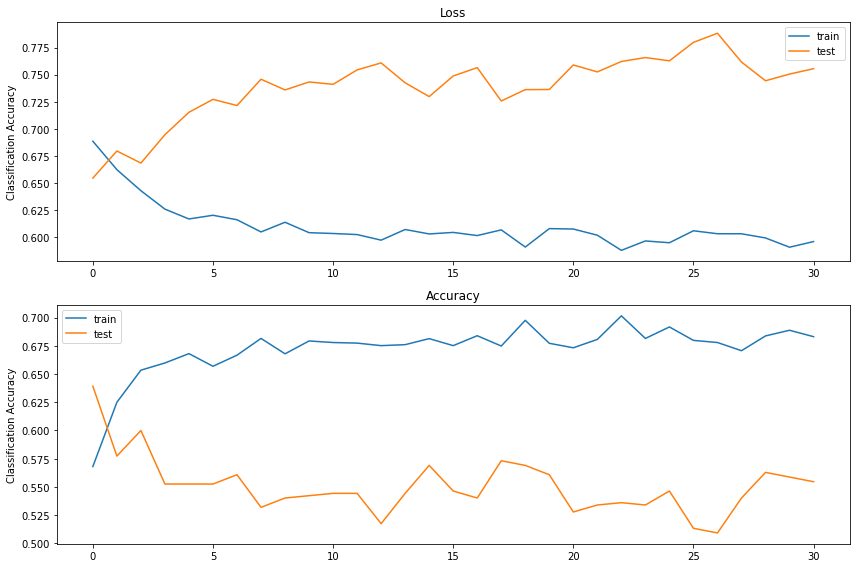

Min of Training Loss: 0.587970
Max of Training Accuracy: 0.701482
Mean of Training Loss: 0.610001
Mean of Training Accuracy: 0.672087
------------
Max of Testing Accuracy: 0.639175
Min of Testing Loss: 0.654601
Mean of Testing Loss: 0.738705
Mean of Testing Accuracy: 0.550848
------------


In [119]:
__MLP.clf_report(train_loss, train_acc, val_loss_list, val_acc)

In [121]:
model = POS_net()
PATH = './Model/temp_model.pt'
model.load_state_dict(torch.load(PATH))
__MLP.predict(model, criterion, test_dataloader, test_size)

accuracy_score:		0.6392
Precision Score:	0.8464
Recall Score:		0.6423
f1_score:		0.5996
Test_loss:		0.6546
